
Quantidade de execuções de cada algoritmo: 50

Tempo de Execução:
   Tamanho  Quicksort (s)  Heapsort (s)  Shellsort (s)
0      500       0.000404      0.000704       0.000386
1     5000       0.005301      0.010158       0.007023
2    10000       0.011796      0.022719       0.015544
3    30000       0.039958      0.079773       0.050497

Número de Comparações:
   Tamanho  Comparações Quicksort  Comparações Heapsort  Comparações Shellsort
0      500                4800.78               7413.96                5761.38
1     5000               71527.68             107289.80               93981.82
2    10000              156908.36             234340.16              210078.30
3    30000              533851.26             796405.10              668579.94

Número de Trocas:
   Tamanho  Trocas Quicksort  Trocas Heapsort  Trocas Shellsort
0      500           2703.48          4018.72           2510.90
1     5000          38947.52         56722.46          41472.46
2    10000          85386.42

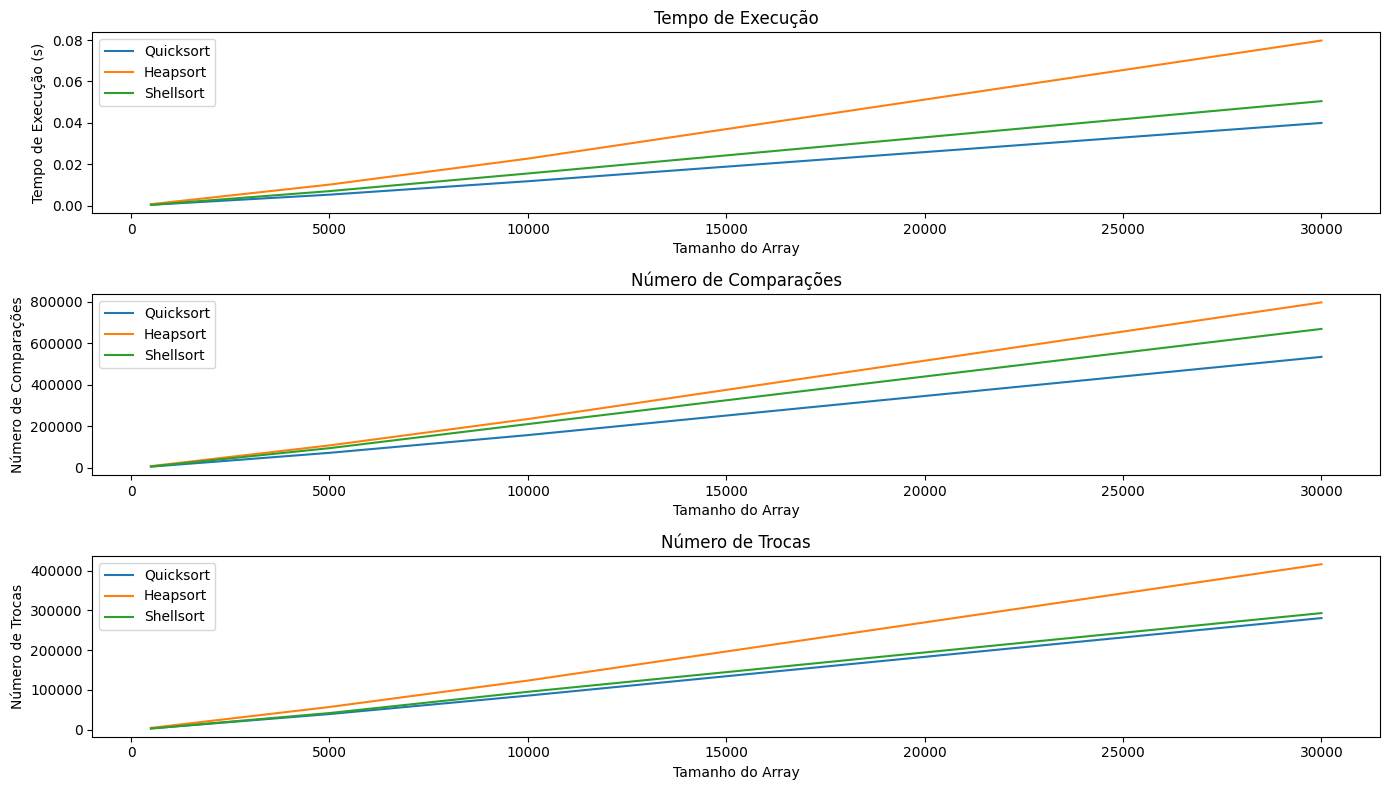

In [5]:
#Questão 8 - lista 5
# O objetivo desse exercício é fazer um estudo comparativo entre os  algoritmos de ordenação Quicksort, Heapsort e Shellsort.
# Segue implementação dos algoritmos de ordenação e a função test_sorting_algorithms que compara o tempo de execução, número de comparações e número de trocas entre os algoritmos.

import time
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def quicksort(arr):
    comparisons = 0
    swaps = 0

    def partition(low, high):
        nonlocal comparisons, swaps
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            comparisons += 1
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[i], arr[j]
                swaps += 1
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        swaps += 1
        return i + 1

    def quicksort_recursive(low, high):
        if low < high:
            pi = partition(low, high)
            quicksort_recursive(low, pi - 1)
            quicksort_recursive(pi + 1, high)

    quicksort_recursive(0, len(arr) - 1)
    return comparisons, swaps

def heapsort(arr):
    comparisons = 0
    swaps = 0

    def heapify(n, i):
        nonlocal comparisons, swaps
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2

        if l < n:
            comparisons += 1
            if arr[l] > arr[largest]:
                largest = l

        if r < n:
            comparisons += 1
            if arr[r] > arr[largest]:
                largest = r

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            swaps += 1
            heapify(n, largest)

    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        swaps += 1
        heapify(i, 0)

    return comparisons, swaps

def shellsort(arr):
    comparisons = 0
    swaps = 0
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap:
                comparisons += 1
                if arr[j - gap] > temp:
                    arr[j] = arr[j - gap]
                    swaps += 1
                    j -= gap
                else:
                    break
            arr[j] = temp
        gap //= 2
    return comparisons, swaps

def test_sorting_algorithms():
    sizes = [500, 5000, 10000, 30000]
    algorithms = {
        "Quicksort": quicksort,
        "Heapsort": heapsort,
        "Shellsort": shellsort
    }
    
    num_runs = 50  # Número de execuções para calcular a média

    times_quicksort = []
    times_heapsort = []
    times_shellsort = []
    comparisons_quicksort = []
    comparisons_heapsort = []
    comparisons_shellsort = []
    swaps_quicksort = []
    swaps_heapsort = []
    swaps_shellsort = []

    for size in sizes:
        for name, algorithm in algorithms.items():
            total_time = 0
            total_comparisons = 0
            total_swaps = 0
            for _ in range(num_runs):
                arr = [random.randint(0, 100) for _ in range(size)]
                start_time = time.time()
                comparisons, swaps = algorithm(arr.copy())
                end_time = time.time()

                total_time += end_time - start_time
                total_comparisons += comparisons
                total_swaps += swaps

            avg_time = total_time / num_runs
            avg_comparisons = total_comparisons / num_runs
            avg_swaps = total_swaps / num_runs

            if name == "Quicksort":
                times_quicksort.append(avg_time)
                comparisons_quicksort.append(avg_comparisons)
                swaps_quicksort.append(avg_swaps)
            elif name == "Heapsort":
                times_heapsort.append(avg_time)
                comparisons_heapsort.append(avg_comparisons)
                swaps_heapsort.append(avg_swaps)
            else:
                times_shellsort.append(avg_time)
                comparisons_shellsort.append(avg_comparisons)
                swaps_shellsort.append(avg_swaps)
    
    print(f"\nQuantidade de execuções de cada algoritmo: {num_runs}\n")
    
    # Cria tabelas comparativas
    df_times = pd.DataFrame({
        "Tamanho": sizes,
        "Quicksort (s)": times_quicksort,
        "Heapsort (s)": times_heapsort,
        "Shellsort (s)": times_shellsort
    })
    
    df_comparisons = pd.DataFrame({
        "Tamanho": sizes,
        "Comparações Quicksort": comparisons_quicksort,
        "Comparações Heapsort": comparisons_heapsort,
        "Comparações Shellsort": comparisons_shellsort
    })
    
    df_swaps = pd.DataFrame({
        "Tamanho": sizes,
        "Trocas Quicksort": swaps_quicksort,
        "Trocas Heapsort": swaps_heapsort,
        "Trocas Shellsort": swaps_shellsort
    })
    
    print("Tempo de Execução:")
    print(df_times)
    print("\nNúmero de Comparações:")
    print(df_comparisons)
    print("\nNúmero de Trocas:")
    print(df_swaps)

    # Plotagem dos gráficos
    plt.figure(figsize=(14, 8))

    plt.subplot(3, 1, 1)
    plt.plot(sizes, times_quicksort, label='Quicksort')
    plt.plot(sizes, times_heapsort, label='Heapsort')
    plt.plot(sizes, times_shellsort, label='Shellsort')
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Tempo de Execução (s)')
    plt.title('Tempo de Execução')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(sizes, comparisons_quicksort, label='Quicksort')
    plt.plot(sizes, comparisons_heapsort, label='Heapsort')
    plt.plot(sizes, comparisons_shellsort, label='Shellsort')
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Número de Comparações')
    plt.title('Número de Comparações')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(sizes, swaps_quicksort, label='Quicksort')
    plt.plot(sizes, swaps_heapsort, label='Heapsort')
    plt.plot(sizes, swaps_shellsort, label='Shellsort')
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Número de Trocas')
    plt.title('Número de Trocas')
    plt.legend()

    plt.tight_layout()
    plt.show()

test_sorting_algorithms()
